# Predict whether it will rain or not (time-series dataset)

This dataset contains daily weather observations from numerous Australian weather stations.

In this case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

This dataset is from the kaggle: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weatherAUS.csv', low_memory=False)
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
weather.shape

(142193, 24)

In [4]:
weather.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Data Dictionary 

You can get the information about the data in http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

1. Date 
2. Location
3. MinTemp = Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree. (Celcius)
4. MaxTemp = Maximum temperature in the 24 hours from 9am. Sometimes only known to the nearest whole degree.(Celcius)
5. Rainfall = Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre.(milimetres)
6. Evaporation = "Class A" pan evaporation in the 24 hours to 9am.(milimetres)
7. Sunshine = Bright sunshine in the 24 hours to midnight.(Hours)
8. WindGustDir = Direction of strongest gust in the 24 hours to midnight.(16 compass point)
9. WindGustSpeed = Speed of strongest wind gust in the 24 hours to midnight.(kilometres per hour)
10. WindDir9am = Wind direction averaged over 10 minutes prior to 9 am.(compass point)
11. WindDir3pm = Wind direction averaged over 10 minutes prior to 3 pm.(compass point)
12. WindSpeed9am = Wind speed averaged over 10 minutes prior to 9 am.(kilometres per hour)
13. WindSpeed3pm = Wind speed averaged over 10 minutes prior to 3 pm.(kilometres per hour)
14. Humidity9am = Relative humidity at 9 am.(percent)
15. Humidity3pm = Relative humidity at 3 pm.(percent)
16. Pressure9am = Atmospheric pressure reduced to mean sea level at 9 am.(hectopascals)
17. Pressure3pm = Atmospheric pressure reduced to mean sea level at 3 pm.(hectopascals)
18. Cloud9am = Fraction of sky obscured by cloud at 9 am.(eigths)
19. Cloud3pm = Fraction of sky obscured by cloud at 3 pm.(eights)
20. Temp9am = Temperature at 9 am.(celcius)
21. Temp3pm = Temperature at 3 pm.(celcius)
22. RainToday = whether it will rain today or not? (yes/no).
23. Risk_MM = RISKMM is the amount of rainfall in millimeters for the next day. It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. For example, if RISKMM was greater than 0, then the RainTomorrow target variable is equal to Yes.
24. RainTomorrow = wheter it will rain tomorrow or not? (yes/no). **[Target Column]**

Let's check the target column

In [6]:
weather.RainTomorrow.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

As we can see, the difference between two classes is a little bit high, around 77% for one class and 22% for the other. We can categorized this dataset as an **imbalanced dataset**.  

To deal with imbalanced dataset, we must apply different technique for this dataset. You can check https://www.kaggle.com/getting-started/100018 to understand about imbalanced dataset and how to deal with it or search on the internet. Later in this project, i will use SMOTE(over-sampling method) to make the minority class equal to the majority class.

You can check how to use SMOTE in: https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79

### Parsing Date

When working with time series data, it's a good idea to make sure any date data is the format of a datetime object.

In [7]:
weather = pd.read_csv('weatherAUS.csv', low_memory=False, parse_dates=['Date'])
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Check datatype of Date column....

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [9]:
corr_matrix = weather.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


In [10]:
# Let's make a copy of the original Data Frame 
rain_weather = weather.copy()
rain_weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [11]:
rain_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [12]:
rain_weather.head().T

,0,1,2,3,4
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


Based on the content description on the kaggle, we should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to the model and reduce its predictability.

You can read more about it in: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316

In [13]:
# drop RISK_MM column
rain_weather.drop('RISK_MM', axis=1, inplace=True)

In [14]:
rain_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [15]:
# sort dataframe in date order
rain_weather.sort_values(by=['Date'], inplace=True, ascending=True)
rain_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
44352,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
44353,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
44354,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
44355,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No
44356,2007-11-06,Canberra,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,...,70.0,57.0,1023.8,1021.7,7.0,5.0,10.9,14.8,No,No
44357,2007-11-07,Canberra,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,...,63.0,47.0,1024.6,1022.2,4.0,6.0,12.4,17.3,No,No
44358,2007-11-08,Canberra,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,...,65.0,57.0,1026.2,1024.2,6.0,7.0,12.1,15.5,No,No
44359,2007-11-09,Canberra,8.8,19.5,0.0,4.0,4.1,S,48.0,E,...,70.0,48.0,1026.1,1022.7,7.0,7.0,14.1,18.9,No,Yes
44360,2007-11-10,Canberra,8.4,22.8,16.2,5.4,7.7,E,31.0,S,...,82.0,32.0,1024.1,1020.7,7.0,1.0,13.3,21.7,Yes,No


Now we have our dataset sorted in ascending order by Date. Let's add more datetime parameter to enrich our dataset.

You can check more about pandas datetime index in: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

In [16]:
# Add datetime parameters for saledate
rain_weather['Year'] = rain_weather.Date.dt.year
rain_weather['Month'] = rain_weather.Date.dt.month
rain_weather['Day'] = rain_weather.Date.dt.day
rain_weather["saleDayofweek"] = rain_weather.Date.dt.dayofweek
rain_weather['WeekofYear'] = rain_weather.Date.dt.weekofyear

# drop the original Date column
rain_weather.drop('Date', axis=1, inplace=True)

In [17]:
rain_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 44351 to 35838
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-n

In [18]:
# find numeric columns
for label, content in rain_weather.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Year
Month
Day
saleDayofweek
WeekofYear


In [19]:
# find non numeric columns
for label, content in rain_weather.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [20]:
# find non numeric columns with missing values
for label, content in rain_weather.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

WindGustDir
WindDir9am
WindDir3pm
RainToday


In [21]:
# fill missing values in numeric columns with median
for label, content in rain_weather.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            rain_weather[label] = content.fillna(content.median())

In [22]:
rain_weather.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
saleDayofweek        0
WeekofYear           0
dtype: int64

In [23]:
# This will turn all of the string values into category values
for label, content in rain_weather.items():
    if pd.api.types.is_string_dtype(content):
        rain_weather[label] = content.astype("category").cat.as_ordered()

In [24]:
rain_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 44351 to 35838
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Location       142193 non-null  category
 1   MinTemp        142193 non-null  float64 
 2   MaxTemp        142193 non-null  float64 
 3   Rainfall       142193 non-null  float64 
 4   Evaporation    142193 non-null  float64 
 5   Sunshine       142193 non-null  float64 
 6   WindGustDir    132863 non-null  category
 7   WindGustSpeed  142193 non-null  float64 
 8   WindDir9am     132180 non-null  category
 9   WindDir3pm     138415 non-null  category
 10  WindSpeed9am   142193 non-null  float64 
 11  WindSpeed3pm   142193 non-null  float64 
 12  Humidity9am    142193 non-null  float64 
 13  Humidity3pm    142193 non-null  float64 
 14  Pressure9am    142193 non-null  float64 
 15  Pressure3pm    142193 non-null  float64 
 16  Cloud9am       142193 non-null  float64 
 17  Cloud3p

In [25]:
rain_weather.RainTomorrow.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=True)

In [26]:
for label, content in rain_weather.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        rain_weather[label+'_is_missing'] = pd.isna(content)
        # We add the +1 because pandas encodes missing categories as -1
        rain_weather[label] = pd.Categorical(content).codes+1

In [27]:
rain_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 44351 to 35838
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Location                 142193 non-null  int8   
 1   MinTemp                  142193 non-null  float64
 2   MaxTemp                  142193 non-null  float64
 3   Rainfall                 142193 non-null  float64
 4   Evaporation              142193 non-null  float64
 5   Sunshine                 142193 non-null  float64
 6   WindGustDir              142193 non-null  int8   
 7   WindGustSpeed            142193 non-null  float64
 8   WindDir9am               142193 non-null  int8   
 9   WindDir3pm               142193 non-null  int8   
 10  WindSpeed9am             142193 non-null  float64
 11  WindSpeed3pm             142193 non-null  float64
 12  Humidity9am              142193 non-null  float64
 13  Humidity3pm              142193 non-null  float64
 14  P

In [28]:
rain_weather.RainTomorrow.value_counts()

1    110316
2     31877
Name: RainTomorrow, dtype: int64

In [29]:
rain_weather.shape

(142193, 33)

In [30]:
rain_weather.RainToday_is_missing.value_counts()

False    140787
True       1406
Name: RainToday_is_missing, dtype: int64

In [31]:
rain_weather.isna().sum()

Location                   0
MinTemp                    0
MaxTemp                    0
Rainfall                   0
Evaporation                0
Sunshine                   0
WindGustDir                0
WindGustSpeed              0
WindDir9am                 0
WindDir3pm                 0
WindSpeed9am               0
WindSpeed3pm               0
Humidity9am                0
Humidity3pm                0
Pressure9am                0
Pressure3pm                0
Cloud9am                   0
Cloud3pm                   0
Temp9am                    0
Temp3pm                    0
RainToday                  0
RainTomorrow               0
Year                       0
Month                      0
Day                        0
saleDayofweek              0
WeekofYear                 0
Location_is_missing        0
WindGustDir_is_missing     0
WindDir9am_is_missing      0
WindDir3pm_is_missing      0
RainToday_is_missing       0
RainTomorrow_is_missing    0
dtype: int64

Now we don't have missing values in our data.....

### Modelling

In [32]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [33]:
# split data into X and y 
X = rain_weather.drop('RainTomorrow', axis=1)
y = rain_weather['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# fit model with LogisticRegression()
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8383909420162453

In [36]:
confusion_matrix(y_test, y_pred)

array([[20855,  1264],
       [ 3332,  2988]], dtype=int64)

In [37]:
recall_score(y_test, y_pred)

0.9428545594285456

In [38]:
# import SMOTE for imbalanced dataset
from imblearn.over_sampling import SMOTE

In [39]:
y_train.value_counts()/len(y_train)

1    0.775331
2    0.224669
Name: RainTomorrow, dtype: float64

In [40]:
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [41]:
y_train.value_counts()/len(y_train)

2    0.5
1    0.5
Name: RainTomorrow, dtype: float64

In [42]:
y_train.value_counts()

2    88197
1    88197
Name: RainTomorrow, dtype: int64

In [43]:
lr.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
y_pred = lr.predict(X_test)
base_lr = accuracy_score(y_test, y_pred)
base_lr

0.7819191954710081

In [45]:
confusion_matrix(y_test, y_pred)

array([[17544,  4575],
       [ 1627,  4693]], dtype=int64)

In [46]:
recall_score(y_test, y_pred)

0.7931642479316425

In [47]:
%%time
# Tuning a model with GridSearchCV()
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ['liblinear']
}

gs_log_reg = GridSearchCV(lr, param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train[:20000], y_train[:20000])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.2s finished


Wall time: 29.7 s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(X_test, y_test)

0.8423643588030522

In [50]:
%%time
ideal_lr = LogisticRegression(C= 0.03359818286283781, solver='liblinear', random_state=42, n_jobs=-1)
ideal_lr.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Wall time: 7.66 s


LogisticRegression(C=0.03359818286283781, n_jobs=-1, random_state=42,
                   solver='liblinear')

In [51]:
ideal_lr.score(X_test, y_test)

0.7884243468476388

Our model accuracy improved a little bit after tuning hyperparameter with `GridSearchCV`. Let's try modelling with `RandomForestClassifier()`. 

In [52]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
base_rfc = rfc.score(X_test, y_test)
base_rfc

0.850170540455009

I think it's better to move forward with `RandomForestClassifier()`. Because we already had around 85% accuracy score. 

In [54]:
%%time
# Let's try tuning hyperparameter with RandomizedSearchCV()
rfc_grid = {
    "n_estimators": [100, 500, 1200],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [5, 8, 15],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
    "bootstrap": [True, False],
    "max_samples":[10000]
}

rs_rfc = RandomizedSearchCV(rfc, param_distributions=rfc_grid, cv=5, n_iter=10, verbose=True)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 45.6min finished


Wall time: 46min 7s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 8, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 500, 1200]},
                   verbose=True)

In [55]:
rs_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

In [56]:
rs_rfc.score(X_test, y_test)

0.8383206160554169

### Evaluating a classification model

As we can see the original `RandomForestClassifier()` model performs best. Let's evaluate the model.....

In [57]:
# Let's see predictions on the data with RandomForestClassifier()
y_pred = rfc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 2], dtype=int8)

2 : No Rain Tomorrow

1 : Rain Tomorrow

In [58]:
confusion_matrix(y_test, y_pred)

array([[20186,  1933],
       [ 2328,  3992]], dtype=int64)

In [59]:
recall_score(y_test, y_pred)

0.9126090691260907

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.91      0.90     22119
           2       0.67      0.63      0.65      6320

    accuracy                           0.85     28439
   macro avg       0.79      0.77      0.78     28439
weighted avg       0.85      0.85      0.85     28439



In [61]:
y.value_counts()

1    110316
2     31877
Name: RainTomorrow, dtype: int64

In [62]:
def plot_roc(model1, model2, model3, model4):
    """
    Function for plotting ROC with different models.
    """
    plot_roc_curve(model1, X_test, y_test);
    plot_roc_curve(model2, X_test, y_test);
    plot_roc_curve(model3, X_test, y_test);
    plot_roc_curve(model4, X_test, y_test);

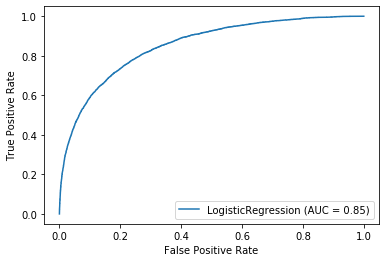

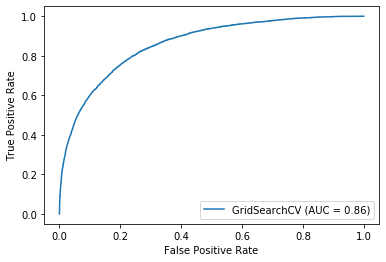

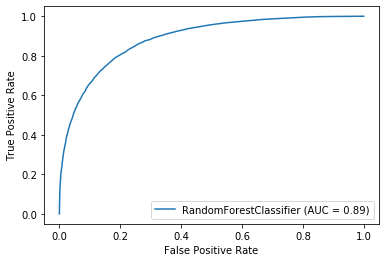

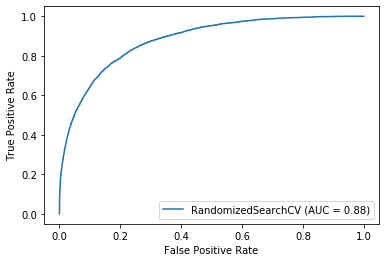

In [63]:
plot_roc(lr, gs_log_reg, rfc, rs_rfc)

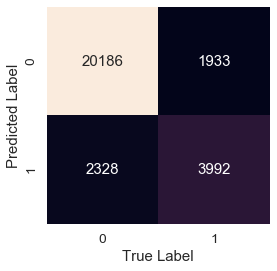

In [64]:
# import seaborn 
import seaborn as sns
sns.set(font_scale=1.25) 

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False,
                    fmt='d')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, y_pred)

In [65]:
def cv_metrics(model):
    """
    Evaluate a model with classification metrics.
    """
    cv_mtr = {
        "Accuracy": np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy")),
        "Precision": np.mean(cross_val_score(model, X, y, cv=5, scoring="precision")),
        "Recall": np.mean(cross_val_score(model, X, y, cv=5, scoring="recall")),
        "f1": np.mean(cross_val_score(model, X, y, cv=5, scoring="f1"))
    }
    return cv_mtr

In [66]:
# evaluate LogisticRegression's best params
cv_metrics(ideal_lr)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not ha

{'Accuracy': 0.8420526457452183,
 'Precision': 0.8639678344725861,
 'Recall': 0.9452844267045023,
 'f1': 0.9027842044546087}

In [67]:
# evaluate random forest classifier 
cv_metrics(rfc)

{'Accuracy': 0.851504585700004,
 'Precision': 0.8678152885211287,
 'Recall': 0.9539776163269288,
 'f1': 0.9088303121615627}

In [68]:
# visualize classification report in Data Frame from rfc model
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,1,2,accuracy,macro avg,weighted avg
precision,0.896598,0.673755,0.850171,0.785176,0.847075
recall,0.912609,0.631646,0.850171,0.772127,0.850171
f1-score,0.904533,0.652021,0.850171,0.778277,0.848417
support,22119.000000,6320.000000,0.850171,28439.000000,28439.000000


In [77]:
# Let's check the feature importance for rfc model
rfc.feature_importances_

array([0.0226184 , 0.0287982 , 0.02880738, 0.10048624, 0.02090166,
       0.05652369, 0.0191193 , 0.05153017, 0.01967812, 0.02122134,
       0.02414403, 0.02618323, 0.0465126 , 0.14254265, 0.03821651,
       0.04566109, 0.05211832, 0.08301632, 0.02671748, 0.03025583,
       0.01424594, 0.0162863 , 0.01439276, 0.02142003, 0.01585833,
       0.02252197, 0.        , 0.0022959 , 0.00144636, 0.00138425,
       0.00509562, 0.        ])

In [82]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

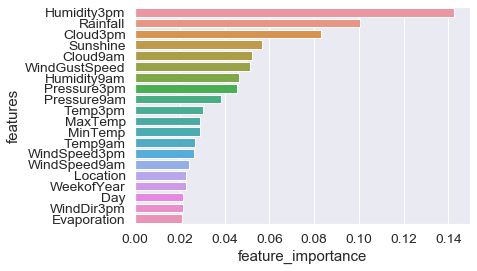

In [83]:
plot_features(X_train.columns, rfc.feature_importances_)

If you find something wrong or maybe you feel something can be improved......... Please notify me in e-mail. Thank You!!!